In [14]:
# Import packages
import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load data
df_fw = pd.read_parquet("../data/extra/2_stations.parquet")

In [16]:
#this function compares the prices for different gas station on a certain day. Target identify if brands change the prices simultaionsly
def plot_diffstat(df, year, week, day, uuid, analyzer='e5',title=None,params=None):
    """Compares the prices for different gas stations on a certain day

    Input example: 
        plot_diffstat(df_hh,2025,8,'Tuesday', list(df_hh[df_hh['brand']== 'ARAL']['station_uuid'].unique()), analyzer = 'e5')
        plot_diffstat(df_fw,2025,8, 'Tuesday', ['f97bcef8-619c-4ac4-bf9d-35995dea884e', 'ca59821d-9be3-4716-81e8-9aba1bca33d5'], analyzer = 'e5')

    Args:
        df (DataFrame): input DataFrame containing fuel prices.
        year (integer): i.e. 2025, single value
        week (integer): i.e. 18, single value
        day (integer): i.e. 'Sunday', single value
        uuid (list,string): List expected i.e. ['ca59821d-9be3-4716-81e8-9aba1bca33d5', '08386c5e-29e9-4e40-ab34-ea2107e8eddf'], single values ['ca59821d-9be3-4716-81e8-9aba1bca33d5']
        analyzer (str, optional): description. Defaults to 'e5'.
    """

    if params == None:
        params = {"background":"#f9fcfc",
                  "gridcolor": "#dcdbd9",
                  "legendedge": "#dcdbd9",
                  "legendface": "white",
                  "legendcol": "black",
                  "textcolor": "black"
                  }
        
    df_proc = df[(df['year'] == year) & (df['week'] == week) & (df['day'] == day) & (df['station_uuid'].isin(uuid))]

    df_proc['hue'] = df_proc['brand'].astype(str) + '  ' + df_proc['street'].astype(str)

    # Set figure size
    sns.set_theme(rc={'figure.figsize':(12,6)})

    # Set grid color
    sns.set_style("darkgrid", {"grid.color": params.get("gridcolor")})

    # Change border color of the figure (spines)
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor(params.get("gridcolor"))

    sns.lineplot(
        data=df_proc,
        x='time',
        y= analyzer,
        hue='hue',
        palette='Dark2',
        errorbar=None,
        drawstyle='steps-post',
        #legend = None,
        #marker = 'o',
        #linestyle='-',
        linewidth = 3,
        #style='day'

    )
    
    brand = df_proc['brand'].unique()
    city = df_proc['city'].unique()
    plt.xlim(7,22)
    plt.ylim(1.7,1.95)
    plt.xticks(np.arange(5, 24, 2),fontsize=12)
    plt.yticks(fontsize=12)

    # Adapt title
    if title == None:
        plt.title(f'{city[0]}: {analyzer} price {day} in {year} week {week}',fontweight="bold",fontsize=18,color=params.get("textcolor"))
    else:
        plt.title(title,fontweight="bold",fontsize=18,color=params.get("textcolor"))


    # Adapt labels
    plt.xlabel("Time",fontweight="bold",fontsize=16,color=params.get("textcolor"))
    plt.ylabel(f'{analyzer} Price (€/l)',fontweight="bold",fontsize=16,color=params.get("textcolor"))

    # Adapt xticks
    ax = plt.gca()
    xticks = ax.get_xticks()
    xticklabels = []
    for i, tick in enumerate(xticks):
        label = str(tick)+":00"
        xticklabels.append(label)
    ax.set_xticklabels(xticklabels)
    for label in plt.gca().get_xticklabels():
        label.set_fontsize(16)
        label.set_color(params.get("textcolor"))
        label.set_fontsize(16)

    # Adapt yticks
    for label in plt.gca().get_yticklabels():
        label.set_fontweight('normal')
        label.set_color(params.get("textcolor"))
        label.set_fontsize(16)

    plt.tight_layout(pad=2)

    # Adapt background color
    plt.gca().set_facecolor(params.get("background"))
    plt.gcf().set_facecolor(params.get("background"))

    plt.gcf().patch.set_facecolor(params.get("background"))

    #plt.grid(True, which='both', axis='y', linestyle=':', linewidth=0.7)
    #plt.grid(True, which='both', axis='x', linestyle=':', linewidth=0.7)  # vertical grid lines

    # Create legend
    plt.legend(["ARAL","Shell"],fontsize=16,loc='upper right', edgecolor=params.get("legendedge"), facecolor=params.get("legendface"), labelcolor = params.get("legendcol"),framealpha=1)


    return

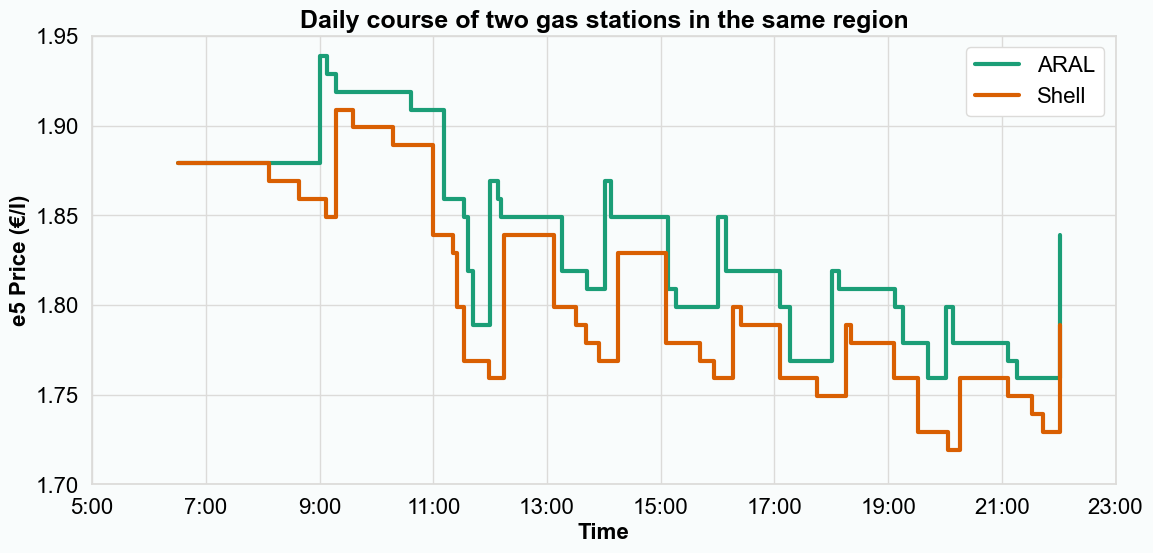

In [17]:
params = {"background":"#f9fcfc",
          "gridcolor": "#dcdbd9",
          "legendedge": "#dcdbd9",
          "legendface": "white",
          "legendcol": "black",
          "textcolor": "black"
          }

plot_diffstat(df_fw,2025,8,'Tuesday', ['ca59821d-9be3-4716-81e8-9aba1bca33d5', '3ca5f739-7334-4e9e-8a26-f9e175d3d57f'],
              analyzer = 'e5',title="Daily course of two gas stations in the same region",params=params)